In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix
from numpy import where
from pyod.utils.data import generate_data, get_outliers_inliers
from pyod.models.pca import PCA

In [11]:
PROJECT_PATH = "C:/Users/HP/Documents/PIP2022/ProjectInterPromo/"

In [16]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

In [3]:
def evaluation_prediction(pred: np.ndarray, y: np.ndarray, display=True):
    """[summary]

    Args:
        pred (np.ndarray): [description]
    """
    confusion_mat = confusion_matrix(y, pred)
    
    tn, fp, fn, tp = confusion_mat.ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    
    if display:
        print("TN / FP \nFN / TP")
        print(confusion_mat)
        print(f"Precision : {precision}")
        print(f"Recall : {recall}")
        print(f"F1_Score : {f1_score}")
    
    return tn, fp, fn, tp

In [27]:
# Lecture du fichier de donnée
data_v0 = pd.read_csv(PROJECT_PATH + "data/SORTIE/Donnees_v0/Donnees_V0_NAN_supprimes.csv")

print("Nombre de fraude :", sum(data_v0["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_v0))
print("Ratio : ", sum(data_v0["TOP_FRAUDE"]) / len(data_v0) * 100)

# Suppression des variables qualitative
quali_col = []
count = 0
for i, name in zip(data_v0.dtypes, data_v0.columns):
    if i == "object":
        quali_col.append(name)

data_quanti = data_v0.drop(columns=quali_col + ["Unnamed: 0"])

# 
data_quanti = data_quanti.sample(10000)

print("------------ Sur un echantillion ------------")
print("Nombre de fraude :", sum(data_quanti["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_quanti))
print("Ratio : ", sum(data_quanti["TOP_FRAUDE"]) / len(data_quanti) * 100)

Nombre de fraude : 1479
Nombre de données :  644348
Ratio :  0.22953435100287423
------------ Sur un echantillion ------------
Nombre de fraude : 27
Nombre de données :  10000
Ratio :  0.27


# Modéle PCA

In [42]:
X.columns

Index(['TOP_E_RELEVE', 'MESSAGERIE_WEB_ACTIVE', 'FIAB_TEL_DOMICILE',
       'FIAB_TEL_TRAVAIL', 'FIAB_TEL_PORTABLE', 'FIAB_EMAIL', 'REFUS_SEA',
       'NBJ_CNT_AGENCE_DEPOT_6M', 'NBJ_CNT_AGENCE_VENTE_6M',
       'NBJ_CNT_RDV_AGENCE_6M',
       ...
       'top_produit_Credit', 'top_produit_Epargne', 'top_produit_Services',
       'mt_factu_ttc_M', 'mt_factu_ttc_M6', 'mt_reduc_ttc_M',
       'mt_reduc_ttc_M6', 'mt_rist_ttc_M', 'mt_rist_ttc_M6',
       'Flag_bq_principale'],
      dtype='object', length=228)

In [55]:
X = data_quanti.drop(columns = ["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"])
clf = PCA(contamination=0.002)
clf.fit(X)


PCA(contamination=0.002, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [56]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [57]:
len(y_scores)

10000

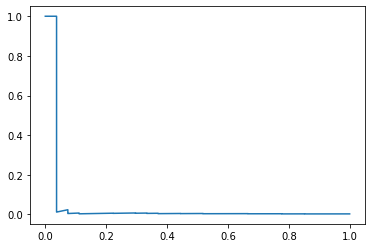

F1 score :  0.07142857142857142
Recall :  1.0
precision :  1.0
Air sous la courbe :  0.041690578946023446


In [64]:
value, f1_score, precision, recall = evaluation(y_scores, data_quanti["TOP_FRAUDE"], display=True)

# L'air sous la courbe
print("F1 score : ", f1_score.max())
print("Recall : ", recall.max())
print("precision : ", precision.max())
print("Air sous la courbe : ", value)